# Random Forest and Boosting Algorithm
## Decision Tree Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
SpamData = pd.read_csv("spambase.csv")
SpamData.head()
len(SpamData)

4601

In [3]:
ListOfAllVariables = SpamData.columns.values
X = SpamData[ListOfAllVariables]
del X['is_spam']
y = SpamData['is_spam']

### Earlier in this course, we used logistic regression model and could achieve 8.2% misclassification error. Now, you know few top of the line algorithms like Random Forest and boosting. Go ahead and beat the Logistic regression algorithm. The champion, the person who beats CV-error of 8.2% and makes the least amount of error will receive a ONE DOLLAR bill award! 
### Just beat it, beat it, beat it, beat it
### No one wants to be defeated
### Showin' how funky strong is your fight 
### It doesn't matter who's wrong or right 
### just boost it, bag it, boost it, beat it

If you are using **Boosting** then set **min_samples_leaf = 10** and **random_state = 24**
Also, in order to be consitent use the following way to cross-validate your errors:

kf = cross_validation.KFold(len(BostonData), n_folds = 10, shuffle = True) 

scores = []

for train_index, test_index in kf:

                                  ...
                                  

If you are working with **Random Forest** then set **random_state = 24** and **min_samples_leaf = 10**. 

### Random Forest

In [4]:
#import the library that will be used in this code

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold 

#### Training my RF model

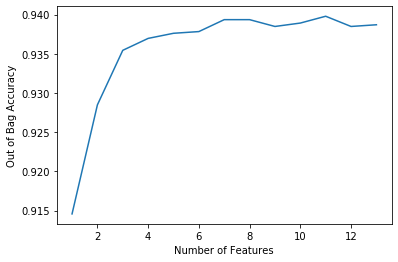

In [5]:
Features = range(1,14)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 10, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 24,
                           n_jobs = -1)
        RFClass.fit(X,y)  
        oob_score_RF.append(RFClass.oob_score_)

plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Accuracy")
plt.show()             
        
# it sounds like choosing max_features as 11 is our best bet

In [6]:
index_Optimal_Features = np.argmax(oob_score_RF)
Optimal_Feature = Features[index_Optimal_Features]
print("The optimal level of features is %i which leads to maximum out of bag accuracy of %f" 
      %(Optimal_Feature, np.max(oob_score_RF)))

The optimal level of features is 11 which leads to maximum out of bag accuracy of 0.939796


In [7]:
kf = KFold(n_splits = 10, shuffle = True) #10 fold CV
#Put our best training model into practice
RFClass = RandomForestClassifier(n_estimators = 1000, 
                                 max_features = Optimal_Feature,
                                 min_samples_leaf = 10,
                                 oob_score = True,
                                 random_state = 24,
                                 n_jobs = -1)

scores = []

for train_index, test_index in kf.split(X):        
        RFClass.fit(X.iloc[train_index], y.iloc[train_index])
        y_hat_test = RFClass.predict(X.iloc[test_index]) 
        scores.append(float(sum(y_hat_test != y.iloc[test_index]))/len(y_hat_test))

MisClass_RF_CV = np.mean(scores)    

print(MisClass_RF_CV) 

0.060857776101103454


### Boosting Algorithm

#### Training my BA model

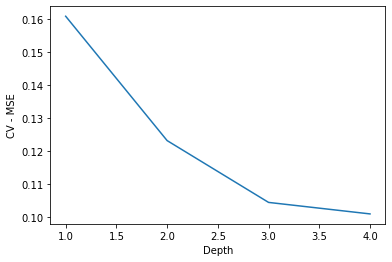

In [8]:
Depth = range(1,5)
Score = []
for i in Depth:
                GBR_Tree = GradientBoostingClassifier(learning_rate = 0.01, # This is lambda, a tuning parameter, usually between 0.01 and 0.1
                                             n_estimators = 100, #This is B, a tuning parameter, using large B can cause overfitting, default=100
                                             max_depth = i, #This is d, another tuning parameter, usually max_depth < 5
                                             min_samples_leaf = 10,
                                             random_state = 24)
        
                Score.append(-cross_val_score(GBR_Tree, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs = -1).mean())

plt.plot(Depth, Score)
plt.xlabel("Depth")
plt.ylabel("CV - MSE")
plt.show()  

# it seems like Max_Depth = 5 gives us the lowest CV-Error

In [9]:
index_Optimal_Depth = np.argmin(Score)
Optimal_Depth = Depth[index_Optimal_Depth]
print("The optimal level of depth is %i which leads to minimum mean squared error of %f" 
      %(Optimal_Depth, np.min(Score)))

The optimal level of depth is 4 which leads to minimum mean squared error of 0.101068


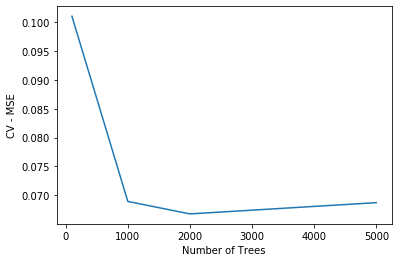

In [10]:
Score = []
NumberOfTrees = [100,1000,2000,5000]
for i in NumberOfTrees:
                GBR_Tree = GradientBoostingClassifier(learning_rate = 0.01, # This is lambda, a tuning parameter, usually between 0.01 and 0.1
                                             n_estimators = i, #This is B, a tuning parameter, using large B can cause overfitting
                                             max_depth = 4, #default=3, we use the depth we get from previous part
                                             min_samples_leaf = 10,
                                             random_state = 24)
        
                Score.append(-cross_val_score(GBR_Tree, X, y, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1).mean())

plt.plot(NumberOfTrees, Score)
plt.xlabel("Number of Trees")
plt.ylabel("CV - MSE")
plt.show()                  
                          
# it seems like at Tree_Size = 2000
# Remember Learning Rate and Number of trees should be tuned with one another. Lower leawrning rates require more trees

In [11]:
Index_Min = np.argmin(Score)
Optimal_tree = NumberOfTrees[Index_Min]
print("Optimal tree = %i which leads to minimum error of %f" %(Optimal_tree, np.min(Score)))

Optimal tree = 2000 which leads to minimum error of 0.066729


In [12]:
kf = KFold(n_splits = 10, shuffle = True) #10 fold CV
#Put our best training model into practice

GBC_Tree = GradientBoostingClassifier(learning_rate = 0.01,
                                      n_estimators = Optimal_tree,
                                      max_depth = Optimal_Depth,
                                      min_samples_leaf = 10,
                                      random_state = 24)

scores = []

for train_index, test_index in kf.split(X):        
        GBC_Tree.fit(X.iloc[train_index], y.iloc[train_index])
        y_hat_test = GBC_Tree.predict(X.iloc[test_index]) 
        scores.append(float(sum(y_hat_test != y.iloc[test_index]))/len(y_hat_test))

MisClass_BA_CV = np.mean(scores)    

print(MisClass_BA_CV) 


0.0473814014901443
